In [15]:
from matplotlib import pyplot as plt
import os
import numpy as np
import json


file_dir = "/data03/sunyi/time_constrained_cot/outputs/1_10"
model_list = [
    "Qwen/QwQ-32B-Preview",
    "Qwen/Qwen2.5-32B-Instruct", 
    "Qwen/Qwen2.5-14B-Instruct", 
    "Qwen/Qwen2.5-7B-Instruct", 
    "Qwen/Qwen2.5-3B-Instruct", 
    "Qwen/Qwen2.5-1.5B-Instruct",
    "mistralai/Mistral-Small-Instruct-2409",
    "mistralai/Mistral-Nemo-Instruct-2407",
    "mistralai/Ministral-8B-Instruct-2410",
    "mistralai/Mathstral-7B-v0.1",
    "google/gemma-2-27b-it",
    "google/gemma-2-9b-it",
    "google/gemma-2-2b-it",
    "microsoft/phi-4",
    "microsoft/Phi-3-medium-128k-instruct",
    "microsoft/Phi-3-small-128k-instruct",
    "microsoft/Phi-3-mini-128k-instruct",
    "microsoft/Phi-3.5-mini-instruct",
]

In [16]:
PROMP_LIST = [ "-aav", "-c2f", "-direct",  "-direct-hard", "-sbs-hard", "-quick-hard"]
 

MODEL_SERIES_MAP = {
    "Qwen/QwQ-32B-Preview": "qwen",
    "Qwen/Qwen2.5-32B-Instruct": "qwen",
    "Qwen/Qwen2.5-14B-Instruct": "qwen",
    "Qwen/Qwen2.5-7B-Instruct": "qwen",
    "Qwen/Qwen2.5-3B-Instruct": "qwen",
    "Qwen/Qwen2.5-1.5B-Instruct": "qwen",
    "google/gemma-2-2b-it": "gemma",
    "google/gemma-2-9b-it": "gemma",
    "google/gemma-2-27b-it": "gemma",
    "mistralai/Mathstral-7B-v0.1": "mistral",
    "mistralai/Ministral-8B-Instruct-2410": "mistral",
    "mistralai/Mistral-Nemo-Instruct-2407": "mistral",
    "mistralai/Mistral-Small-Instruct-2409": "mistral",
    "microsoft/phi-4": "phi4",
    "microsoft/Phi-3-medium-128k-instruct": "phi3medium",
    "microsoft/Phi-3-small-128k-instruct": "phi3small",
    "microsoft/Phi-3.5-mini-instruct": "phi3mini",
    "microsoft/Phi-3-mini-128k-instruct": "phi3mini",
}


MODEL_SERIES_PROMPT_TYPE_MAP = {
    "qwen": ["qwen" + prompt for prompt in PROMP_LIST],
    "mistral": ["mistral"+prompt for prompt in PROMP_LIST],
    "gemma": ["gemma"+prompt for prompt in PROMP_LIST],
    "phi3mini": ["phi3mini"+prompt for prompt in PROMP_LIST],
    "phi3small": ["phi3small"+prompt for prompt in PROMP_LIST],
    "phi3medium": ["phi3medium"+prompt for prompt in PROMP_LIST],
    "phi4": ["phi4"+prompt for prompt in PROMP_LIST],
}

In [17]:
def gen_budget_list(budget, data_name, model):
    if budget < 0:
        return [-1]
    elif budget == 0:
        return [25]
    else:
        if model in ["Qwen/QwQ-32B-Preview", "Skywork/Skywork-o1-Open-Llama-3.1-8B", "PowerInfer/SmallThinker-3B-Preview"]:
            if data_name == "gsm8k":
                budget_list = []
                for i in range(25, 600, 25):
                    budget_list.append(i)
                for i in range(600, 1201, 50):
                    budget_list.append(i)
            elif data_name in ["math", "math500"]:
                budget_list = []
                for i in range(25, 600, 25):
                    budget_list.append(i)
                for i in range(600, 2401, 50):
                    budget_list.append(i)
        else:    
            if data_name == "gsm8k":
                budget_list = []
                for i in range(25, 601, 25):
                    budget_list.append(i)
                # for i in range(600, 1001, 50):
                #     budget_list.append(i)
            elif data_name in ["math", "math500"]:
                budget_list = []
                for i in range(25, 600, 25):
                    budget_list.append(i)
                for i in range(600, 1201, 50):
                    budget_list.append(i)
        return budget_list

In [18]:
dataset = "gsm8k"
something = "_-1_seed0_t0.0_s0_e-1"

In [19]:
model_acc_dicts = {}

for model in model_list:
    model_acc_dict = {}
    budget_list = gen_budget_list(1, dataset, model)
    model_prompt_list = MODEL_SERIES_PROMPT_TYPE_MAP[MODEL_SERIES_MAP[model]]
    for prompt_type in model_prompt_list:
        acc_list = []
        for budget in budget_list:
            file_name = "test_" + prompt_type + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path = os.path.join(file_dir, model, prompt_type, dataset, file_name)
            with open(file_path, "r") as f:
                acc_list.append(json.load(f)["acc"])
        model_acc_dict[prompt_type] = acc_list
    model_acc_dicts[model] = model_acc_dict

model_acc_dicts

{'Qwen/QwQ-32B-Preview': {'qwen-aav': [40.1,
   45.1,
   50.3,
   53.6,
   59.1,
   65.7,
   69.4,
   74.2,
   78.4,
   81.7,
   85.9,
   87.3,
   89.1,
   90.7,
   91.8,
   92.2,
   93.2,
   93.7,
   94.1,
   94.5,
   94.5,
   94.8,
   95.2,
   95.4,
   95.6,
   95.8,
   95.8,
   96.0,
   95.7,
   95.8,
   95.5,
   95.5,
   95.5,
   95.7,
   95.5,
   95.8],
  'qwen-c2f': [37.9,
   44.6,
   51.3,
   58.7,
   65.7,
   71.5,
   77.0,
   80.6,
   84.2,
   87.6,
   89.9,
   90.4,
   91.1,
   92.6,
   92.8,
   92.9,
   93.8,
   93.6,
   94.2,
   94.8,
   94.5,
   95.1,
   95.1,
   95.1,
   94.9,
   95.2,
   95.4,
   95.5,
   95.5,
   95.5,
   95.4,
   95.7,
   95.7,
   95.5,
   95.5,
   95.6],
  'qwen-direct': [38.1,
   41.2,
   43.5,
   46.4,
   50.7,
   56.2,
   61.6,
   68.7,
   74.4,
   78.9,
   82.3,
   84.6,
   86.8,
   89.0,
   90.4,
   92.1,
   92.5,
   93.0,
   93.9,
   94.4,
   94.9,
   95.2,
   95.1,
   95.3,
   95.7,
   95.6,
   95.5,
   95.8,
   96.0,
   96.1,
   96.1,
   96.1,

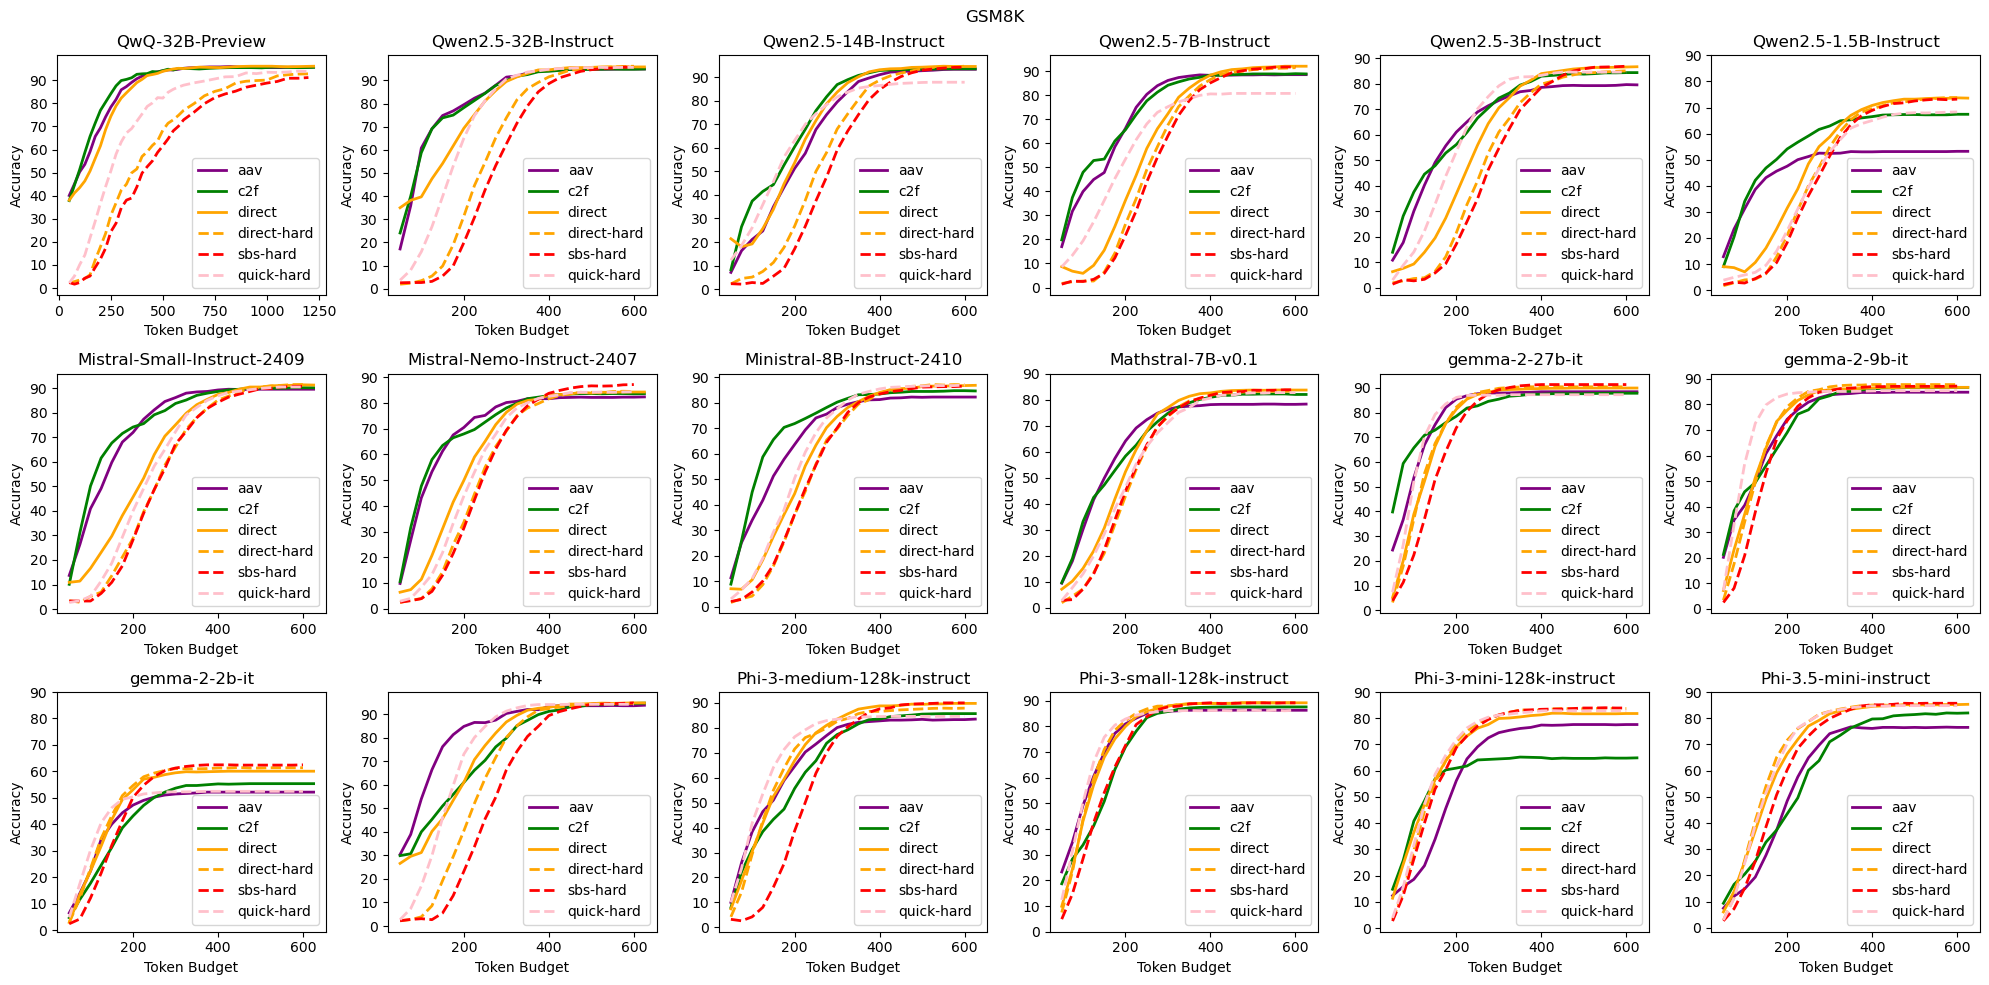

In [20]:
# Create a 2x3 subplot
fig, axs = plt.subplots(3, 6, figsize=(20, 10))
marker_size = 5  # Set the desired marker size
line_width = 2   # Set the desired line width

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Plot all lines first without labels
for index, model in enumerate(model_list):
    budget_list = gen_budget_list(1, dataset, model)
    model_prompt_list = MODEL_SERIES_PROMPT_TYPE_MAP[MODEL_SERIES_MAP[model]]
    for prompt_type in model_prompt_list:
        if "sbs-hard" in prompt_type:
            axs[index].plot(budget_list[1:], model_acc_dicts[model][prompt_type][1:], linestyle='--', color="red", label="sbs-hard", linewidth=line_width)
        elif "direct-hard" in prompt_type:
            axs[index].plot(budget_list[1:], model_acc_dicts[model][prompt_type][1:], linestyle='--', color="orange", label="direct-hard", linewidth=line_width)
        elif "quick-hard" in prompt_type:
            axs[index].plot(budget_list[1:], model_acc_dicts[model][prompt_type][1:], linestyle='--', color="pink", label="quick-hard", linewidth=line_width)
        elif "c2f-hard" in prompt_type:
            axs[index].plot(budget_list[1:], model_acc_dicts[model][prompt_type][1:], linestyle='--', color="green", label="c2f-hard", linewidth=line_width)
        elif "aav-hard" in prompt_type:
            axs[index].plot(budget_list[1:], model_acc_dicts[model][prompt_type][1:], linestyle='--', color="purple", label="aav-hard", linewidth=line_width)
        elif "sbs" in prompt_type:
            axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="red", label="sbs", linewidth=line_width)
        elif "direct" in prompt_type:
            axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="orange", label="direct", linewidth=line_width)
        elif "quick" in prompt_type:
            axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="pink", label="quick", linewidth=line_width)
        elif "c2f" in prompt_type:
            axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="green", label="c2f", linewidth=line_width)
        # elif "kf" in prompt_type:
        #     axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="blue", label="kf", linewidth=line_width)
        elif "aav" in prompt_type:
            axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="purple", label="aav", linewidth=line_width)
        
        axs[index].set_xlabel("Token Budget")
        axs[index].set_ylabel("Accuracy")
        axs[index].set_title(f"{model.split('/')[-1]}")
        axs[index].legend()
        
        # Set y-axis and x-axis ticks
        axs[index].set_yticks(range(0, 91, 10))  # Set y-axis interval to 10
        # axs[index].set_xticks(range(0, 551, 50))  # Set x-axis interval to 50

# set the title
plt.suptitle(f"{dataset}".upper())
# Adjust layout
plt.tight_layout()

KeyError: 'qwen-quick'

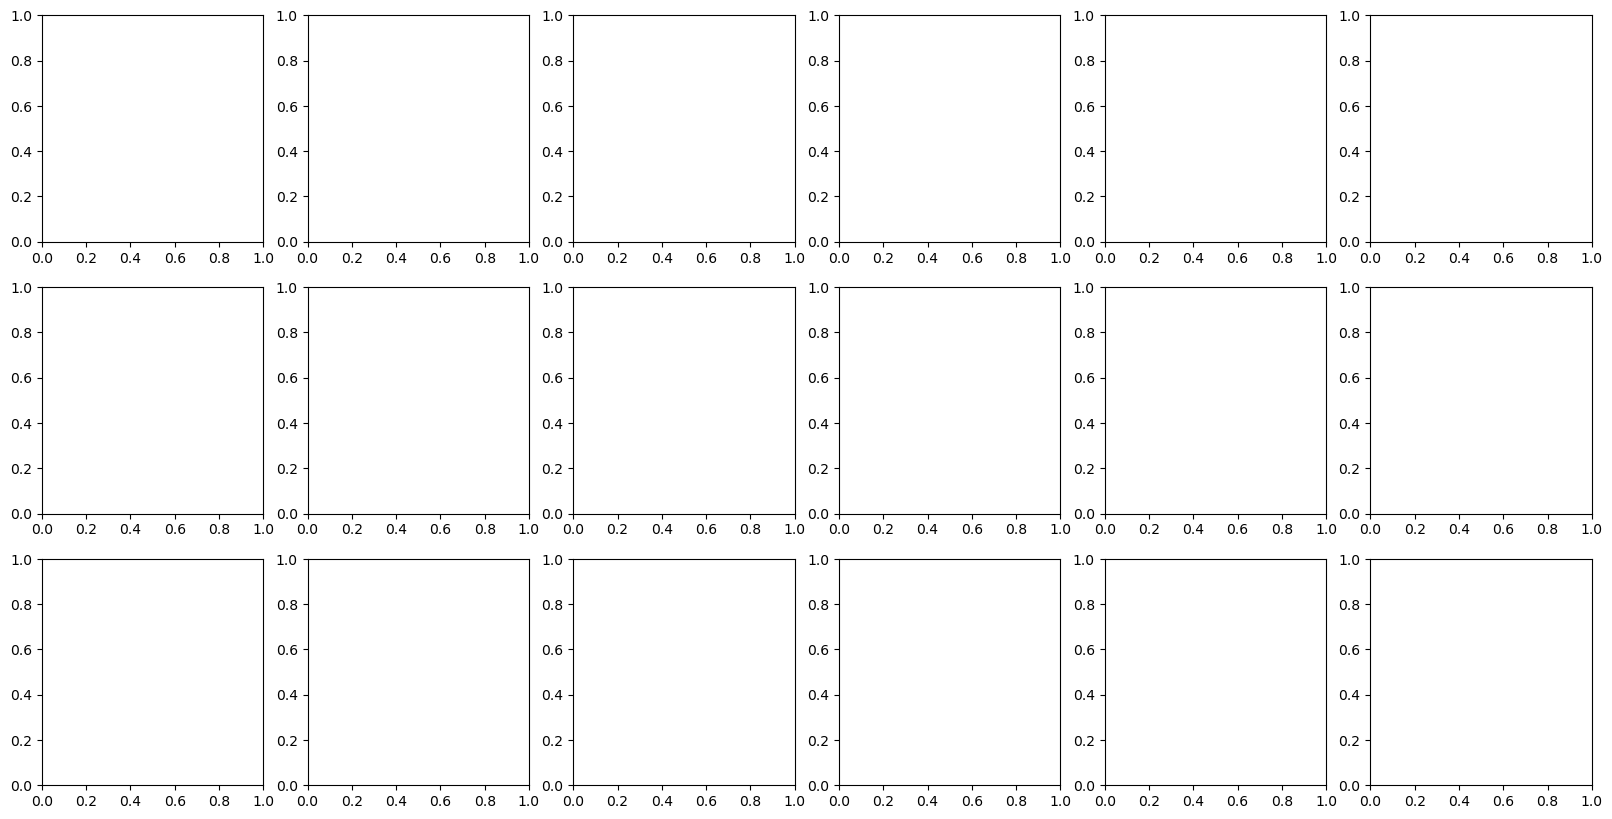

In [21]:
for prompt in ["-quick", "-direct", "-sbs", "-c2f", "-aav"]:
    
    
    # Create a 2x3 subplot
    fig, axs = plt.subplots(3, 6, figsize=(20, 10))
    marker_size = 5  # Set the desired marker size
    line_width = 2   # Set the desired line width

    # Flatten the axes array for easy iteration
    axs = axs.flatten()

    # Plot all lines first without labels
    for index, model in enumerate(model_list):
        budget_list = gen_budget_list(1, dataset, model)
        model_prompt_list = [MODEL_SERIES_MAP[model] + prompt, MODEL_SERIES_MAP[model] + prompt + "-hard"]
        for prompt_type in model_prompt_list:
            if "sbs-hard" in prompt_type:
                axs[index].plot(budget_list[1:], model_acc_dicts[model][prompt_type][1:], linestyle='--', color="red", label="sbs-hard", linewidth=line_width)
            elif "direct-hard" in prompt_type:
                axs[index].plot(budget_list[1:], model_acc_dicts[model][prompt_type][1:], linestyle='--', color="orange", label="direct-hard", linewidth=line_width)
            elif "quick-hard" in prompt_type:
                axs[index].plot(budget_list[1:], model_acc_dicts[model][prompt_type][1:], linestyle='--', color="pink", label="quick-hard", linewidth=line_width)
            elif "c2f-hard" in prompt_type:
                axs[index].plot(budget_list[1:], model_acc_dicts[model][prompt_type][1:], linestyle='--', color="green", label="c2f-hard", linewidth=line_width)
            elif "aav-hard" in prompt_type:
                axs[index].plot(budget_list[1:], model_acc_dicts[model][prompt_type][1:], linestyle='--', color="purple", label="aav-hard", linewidth=line_width)
            elif "sbs" in prompt_type:
                axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="red", label="sbs", linewidth=line_width)
            elif "direct" in prompt_type:
                axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="orange", label="direct", linewidth=line_width)
            elif "quick" in prompt_type:
                axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="pink", label="quick", linewidth=line_width)
            elif "c2f" in prompt_type:
                axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="green", label="c2f", linewidth=line_width)
            # elif "kf" in prompt_type:
            #     axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="blue", label="kf", linewidth=line_width)
            elif "aav" in prompt_type:
                axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="purple", label="aav", linewidth=line_width)
            
            axs[index].set_xlabel("Token Budget")
            axs[index].set_ylabel("Accuracy")
            axs[index].set_title(f"{model.split('/')[-1]}")
            axs[index].legend()
            
            # Set y-axis and x-axis ticks
            axs[index].set_yticks(range(0, 91, 10))  # Set y-axis interval to 10
            # axs[index].set_xticks(range(0, 551, 50))  # Set x-axis interval to 50

    # set the title
    plt.suptitle(f"{dataset}".upper())
    # Adjust layout
    plt.tight_layout()